# Results

- Best Model parameters: Best parameters: XG Boost Cost Sensitive {'scale_pos_weight': 100}
- Mean Cross validation score of Best model: Best Mean cross-validation score: 0.95
- Test score of best model: Test score is 0.9430458109781262
- Train score of best model: Train score is 0.9899091826437943

In [1]:
from math import sqrt
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

pd.pandas.set_option('display.max_columns', None)
%matplotlib inline

In [2]:
df=pd.read_csv('Leads X Education.csv')

data=df.copy()

In [3]:
data.dropna(how="all", inplace=True) 

In [4]:
data.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,How did you hear about X Education,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Lead Quality,Update me on Supply Chain Content,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737.0,API,Olark Chat,No,No,0.0,0.0,0.0,0.0,Page Visited on Website,NaN,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Interested in other courses,Low in Relevance,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728.0,API,Organic Search,No,No,0.0,5.0,674.0,2.5,Email Opened,India,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,NaN,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727.0,Landing Page Submission,Direct Traffic,No,No,1.0,2.0,1532.0,2.0,Email Opened,India,Business Administration,Select,Student,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719.0,Landing Page Submission,Direct Traffic,No,No,0.0,1.0,305.0,1.0,Unreachable,India,Media and Advertising,Word Of Mouth,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,Not Sure,No,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681.0,Landing Page Submission,Google,No,No,1.0,2.0,1428.0,1.0,Converted to Lead,India,Select,Other,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [5]:
data.columns

Index(['Prospect ID', 'Lead Number', 'Lead Origin', 'Lead Source',
       'Do Not Email', 'Do Not Call', 'Converted', 'TotalVisits',
       'Total Time Spent on Website', 'Page Views Per Visit', 'Last Activity',
       'Country', 'Specialization', 'How did you hear about X Education',
       'What is your current occupation',
       'What matters most to you in choosing a course', 'Search', 'Magazine',
       'Newspaper Article', 'X Education Forums', 'Newspaper',
       'Digital Advertisement', 'Through Recommendations',
       'Receive More Updates About Our Courses', 'Tags', 'Lead Quality',
       'Update me on Supply Chain Content', 'Get updates on DM Content',
       'Lead Profile', 'City', 'Asymmetrique Activity Index',
       'Asymmetrique Profile Index', 'Asymmetrique Activity Score',
       'Asymmetrique Profile Score',
       'I agree to pay the amount through cheque',
       'A free copy of Mastering The Interview', 'Last Notable Activity'],
      dtype='object')

In [6]:
#target variable
data['Converted'].value_counts()

0.0    5679
1.0    2434
Name: Converted, dtype: int64

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8113 entries, 0 to 9237
Data columns (total 37 columns):
Prospect ID                                      8113 non-null object
Lead Number                                      8113 non-null float64
Lead Origin                                      8113 non-null object
Lead Source                                      8084 non-null object
Do Not Email                                     8113 non-null object
Do Not Call                                      8113 non-null object
Converted                                        8113 non-null float64
TotalVisits                                      8005 non-null float64
Total Time Spent on Website                      8113 non-null float64
Page Views Per Visit                             8005 non-null float64
Last Activity                                    8031 non-null object
Country                                          5965 non-null object
Specialization                                  

In [8]:
categorical = [var for var in data.columns if data[var].dtypes=='O']
print(categorical)
print(len(categorical))

['Prospect ID', 'Lead Origin', 'Lead Source', 'Do Not Email', 'Do Not Call', 'Last Activity', 'Country', 'Specialization', 'How did you hear about X Education', 'What is your current occupation', 'What matters most to you in choosing a course', 'Search', 'Magazine', 'Newspaper Article', 'X Education Forums', 'Newspaper', 'Digital Advertisement', 'Through Recommendations', 'Receive More Updates About Our Courses', 'Tags', 'Lead Quality', 'Update me on Supply Chain Content', 'Get updates on DM Content', 'Lead Profile', 'City', 'Asymmetrique Activity Index', 'Asymmetrique Profile Index', 'I agree to pay the amount through cheque', 'A free copy of Mastering The Interview', 'Last Notable Activity']
30


In [9]:
data[categorical].head()

,Prospect ID,Lead Origin,Lead Source,Do Not Email,Do Not Call,Last Activity,Country,Specialization,How did you hear about X Education,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Lead Quality,Update me on Supply Chain Content,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,API,Olark Chat,No,No,Page Visited on Website,NaN,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Interested in other courses,Low in Relevance,No,No,Select,Select,02.Medium,02.Medium,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,API,Organic Search,No,No,Email Opened,India,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,NaN,No,No,Select,Select,02.Medium,02.Medium,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,Landing Page Submission,Direct Traffic,No,No,Email Opened,India,Business Administration,Select,Student,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Potential Lead,Mumbai,02.Medium,01.High,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,Landing Page Submission,Direct Traffic,No,No,Unreachable,India,Media and Advertising,Word Of Mouth,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,Not Sure,No,No,Select,Mumbai,02.Medium,01.High,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,Landing Page Submission,Google,No,No,Converted to Lead,India,Select,Other,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Select,Mumbai,02.Medium,01.High,No,No,Modified


In [10]:
numerical = [var for var in data.columns if data[var].dtypes!='O']
print(numerical)
print(len(numerical))

['Lead Number', 'Converted', 'TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit', 'Asymmetrique Activity Score', 'Asymmetrique Profile Score']
7


In [11]:
discrete = [var for var in numerical if len(data[var].unique()) < 20]
print(discrete)
print(f'There are {len(discrete)} discrete variables')

['Converted', 'Asymmetrique Activity Score', 'Asymmetrique Profile Score']
There are 3 discrete variables


In [12]:
continuous = [var for var in numerical if var not in discrete]
print(continuous)
print(len(continuous))

['Lead Number', 'TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit']
4


In [13]:
data[discrete].head()

,Converted,Asymmetrique Activity Score,Asymmetrique Profile Score
0,0.0,15.0,15.0
1,0.0,15.0,15.0
2,1.0,14.0,20.0
3,0.0,13.0,17.0
4,1.0,15.0,18.0


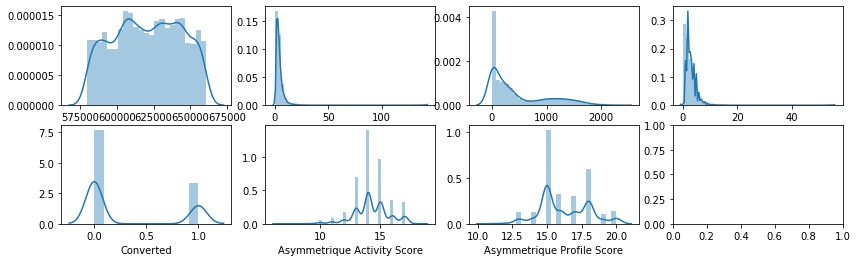

In [14]:
fig, axs = plt.subplots(ncols=4, nrows=2,figsize=(14,4))
axs = axs.flatten()

for i, var in enumerate(continuous+discrete):
    sns.distplot(data[data[var].notnull()][var], ax=axs[i]);

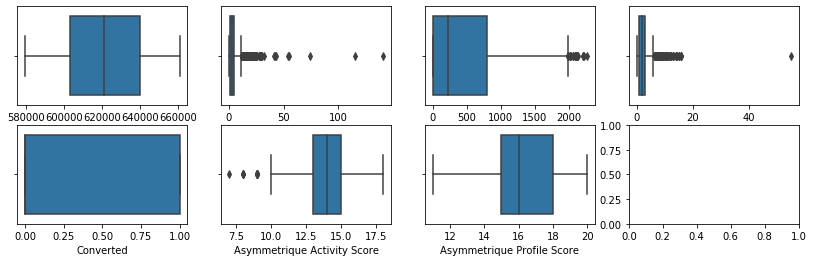

In [15]:
# exploring outliers in the variables
fig, axs = plt.subplots(ncols=4, nrows=2,figsize=(14,4))
axs = axs.flatten()

for i, var in enumerate(continuous+discrete):
    sns.boxplot(data[data[var].notnull()][var], ax=axs[i], orient='h');

In [16]:
total_unique_values= data[categorical + discrete].nunique()
for key,value in total_unique_values.items():
    if value >0:
        print(key,":",value)

Prospect ID : 8113
Lead Origin : 5
Lead Source : 20
Do Not Email : 2
Do Not Call : 2
Last Activity : 15
Country : 37
Specialization : 19
How did you hear about X Education : 10
What is your current occupation : 6
What matters most to you in choosing a course : 3
Search : 2
Magazine : 1
Newspaper Article : 2
X Education Forums : 2
Newspaper : 2
Digital Advertisement : 2
Through Recommendations : 2
Receive More Updates About Our Courses : 1
Tags : 26
Lead Quality : 5
Update me on Supply Chain Content : 1
Get updates on DM Content : 1
Lead Profile : 6
City : 7
Asymmetrique Activity Index : 3
Asymmetrique Profile Index : 3
I agree to pay the amount through cheque : 1
A free copy of Mastering The Interview : 2
Last Notable Activity : 14
Converted : 2
Asymmetrique Activity Score : 12
Asymmetrique Profile Score : 10


In [17]:
missing_data_columns= list(data.columns[data.isnull().mean()>0.0])
missing_data_columns
len(missing_data_columns)

17

In [18]:
#missing numerical columns
missing_num_cols = data[missing_data_columns].select_dtypes(exclude=['object']).columns
len(missing_num_cols)

4

In [19]:
#missing categorical columns
missing_cat_cols = data[missing_data_columns].select_dtypes(include=['object']).columns
len(missing_cat_cols)

13

In [20]:
#fields with select option - imputing select option as nan and treating as null value for imputation
select_missing=[]
for var in categorical:
    if data[data[var]=='Select'].shape[0]>0:
        select_missing += [var]
print(len(select_missing))
select_missing

4


['Specialization',
 'How did you hear about X Education',
 'Lead Profile',
 'City']

In [21]:
data[select_missing].isnull().mean()

Specialization                        0.170714
How did you hear about X Education    0.258844
Lead Profile                          0.317269
City                                  0.168372
dtype: float64

In [22]:
#fill select with na
data[select_missing] = data[select_missing].replace('Select',np.nan)
data[select_missing].isnull().mean()

Specialization                        0.381363
How did you hear about X Education    0.784420
Lead Profile                          0.767287
City                                  0.407124
dtype: float64

In [23]:
data[missing_cat_cols].isnull().mean()

Lead Source                                      0.003575
Last Activity                                    0.010107
Country                                          0.264760
Specialization                                   0.381363
How did you hear about X Education               0.784420
What is your current occupation                  0.314927
What matters most to you in choosing a course    0.317269
Tags                                             0.377665
Lead Quality                                     0.545421
Lead Profile                                     0.767287
City                                             0.407124
Asymmetrique Activity Index                      0.470356
Asymmetrique Profile Index                       0.470356
dtype: float64

In [24]:
#missing numerical columns - should not do mean/median imputation on total visits and page views per visit
#use mean for Asymmetrique profile/activity score
missing_num_cols

Index(['TotalVisits', 'Page Views Per Visit', 'Asymmetrique Activity Score',
       'Asymmetrique Profile Score'],
      dtype='object')

In [25]:
#impute with not recorded
no_select_missing = list(set(missing_cat_cols)-set(select_missing))
no_select_missing

['Last Activity',
 'Asymmetrique Activity Index',
 'Country',
 'What matters most to you in choosing a course',
 'Asymmetrique Profile Index',
 'What is your current occupation',
 'Tags',
 'Lead Source',
 'Lead Quality']

In [26]:
data[categorical].isnull().mean()

Prospect ID                                      0.000000
Lead Origin                                      0.000000
Lead Source                                      0.003575
Do Not Email                                     0.000000
Do Not Call                                      0.000000
Last Activity                                    0.010107
Country                                          0.264760
Specialization                                   0.381363
How did you hear about X Education               0.784420
What is your current occupation                  0.314927
What matters most to you in choosing a course    0.317269
Search                                           0.000000
Magazine                                         0.000000
Newspaper Article                                0.000000
X Education Forums                               0.000000
Newspaper                                        0.000000
Digital Advertisement                            0.000000
Through Recomm

In [27]:
#categories which should be encoded with ordered encoding
order_cat = ['Lead Profile','Lead Quality',  'Asymmetrique Activity Index','Asymmetrique Profile Index']
nominal_cat = list(set(categorical)-set(order_cat))
print(len(categorical))
print(len(nominal_cat))
print(len(order_cat))

30
26
4


In [28]:
#divide dataset into train, test

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data.drop(['Converted'], axis=1),
                                                    data['Converted'],
                                                    test_size=0.2,
                                                    random_state=0)

X_train.shape, X_test.shape

((6490, 36), (1623, 36))

In [29]:
# import relevant modules for feature engineering
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from feature_engine import missing_data_imputers as mdi
from feature_engine import categorical_encoders as ce
from feature_engine.variable_transformers import YeoJohnsonTransformer
from feature_engine.variable_transformers import PowerTransformer
from sklearn.impute import SimpleImputer

In [30]:
data_pre_process = Pipeline([
    
    # missing data imputation 
   ('mean_median_imputation', mdi.MeanMedianImputer(imputation_method='mean',
                                   variables=['Asymmetrique Profile Score','Asymmetrique Activity Score'])),
    ('arbit_number_imputation', mdi.ArbitraryNumberImputer(arbitrary_number=99999, 
                                              variables=['TotalVisits', 'Page Views Per Visit'])),
    ('imp_cat_missing', mdi.CategoricalVariableImputer()),
    #('imp',SimpleImputer(strategy='constant',fill_value='Missing')),
    
    #categorical variables
    ('rare_label_enc', ce.RareLabelCategoricalEncoder(
         tol=0.01,n_categories=6, variables=categorical)),
    ('categorical_enc', ce.OneHotCategoricalEncoder(variables = nominal_cat)),
    ('orderd_encoding',ce.OrdinalCategoricalEncoder(variables=order_cat,
                                        encoding_method='arbitrary')),  

    # Transforming Numerical Variables
   ('yjt', PowerTransformer()),

    # feature Scaling
     #('scaler', StandardScaler())
    
])

In [31]:
data_pre_process.fit(X_train,y_train)

Pipeline(memory=None,
         steps=[('mean_median_imputation',
                 MeanMedianImputer(imputation_method='mean',
                                   variables=['Asymmetrique Profile Score',
                                              'Asymmetrique Activity Score'])),
                ('arbit_number_imputation',
                 ArbitraryNumberImputer(arbitrary_number=99999,
                                        variables=['TotalVisits',
                                                   'Page Views Per Visit'])),
                ('imp_cat_missing',
                 CategoricalVariableImputer(variables=['Prosp...
                                             'Digital Advertisement_No',
                                             'Digital Advertisement_Yes',
                                             'What matters most to you in '
                                             'choosing a course_Missing',
                                             'What matters most to y

In [32]:
X_train = data_pre_process.transform(X_train)
X_test = data_pre_process.transform(X_test)

# Exam Requirements

### Naive Classifier

In [33]:
#Making f2 scorer for Grid search CV
from sklearn.metrics import fbeta_score, make_scorer
ftwo_scorer = make_scorer(fbeta_score, beta=2)
ftwo_scorer

make_scorer(fbeta_score, beta=2)

In [34]:
from sklearn.dummy import DummyClassifier
from sklearn.model_selection import cross_val_score
dummy_clf = DummyClassifier(strategy="constant",constant=1).fit(X_train,y_train)
cv_scores = cross_val_score(dummy_clf, X_train, y_train, scoring=ftwo_scorer, cv=10, n_jobs=-1)
print("Mean Cross-validation scores: {}".format(cv_scores.mean()))
# Check test data set performance
print("Performance on train set: ", dummy_clf.score(X_train,y_train))
print("Performance on test set: ", dummy_clf.score(X_test,y_test))

Mean Cross-validation scores: 0.6841951398125796
Performance on train set:  0.3023112480739599
Performance on test set:  0.29081947011706716


## Basic Algorithms

In [34]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import LinearSVC
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from  sklearn.ensemble import ExtraTreesClassifier
from  sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import StackingClassifier
from sklearn.metrics import f1_score
from numpy import mean
from sklearn.datasets import make_classification
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.metrics import fbeta_score

### Logistic Regression



In [53]:
import warnings
warnings.filterwarnings("ignore")
logreg=LogisticRegression(max_iter=1000)

logreg_param= {'C': [0.001,0.01,0.1,1,10,100], 'penalty': ['l1','l2','elasticnet']}
logreg_grid = GridSearchCV(logreg, logreg_param,cv=5, return_train_score=True,scoring=ftwo_scorer)
logreg_grid.fit(X_train,y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                          fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=1000, multi_class='auto',
                                          n_jobs=None, penalty='l2',
                                          random_state=None, solver='lbfgs',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='deprecated', n_jobs=None,
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100],
                         'penalty': ['l1', 'l2', 'elasticnet']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scoring=make_scorer(fbeta_score, beta=2), verbose=0)

In [54]:
print(f'Best Mean Cross Validation Score is {logreg_grid.best_score_}')
print(f'Best Mean Cross Validation Score is {logreg_grid.best_params_}')
print(f'Train score is {logreg_grid.score(X_train,y_train)}')
print(f'Test score is {logreg_grid.score(X_test,y_test)}')

Best Mean Cross Validation Score is 0.9047463101462334
Best Mean Cross Validation Score is {'C': 100, 'penalty': 'l2'}
Train score is 0.9081108829568789
Test score is 0.8996171841769461


### Decision Tree

In [36]:
dtree = DecisionTreeClassifier()
dtree_param = {"max_depth": range(1,10),
           "min_samples_split": range(2,10,1),
           "max_leaf_nodes": range(2,6),
              "splitter": ["best", "random"]}
dtree_grid = GridSearchCV(dtree, dtree_param,cv=5, return_train_score=True, scoring=ftwo_scorer)
dtree_grid.fit(X_train,y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort='deprecated',
                                              random_state=None,
                                              splitter='best'),
             iid='deprecated', n_jobs=None,
             param_grid={'max_depth': range(1, 10),
                         '

In [37]:
print(f'Best Mean Cross Validation Score is {dtree_grid.best_score_}')
print(f'Best Mean Cross Validation Score is {dtree_grid.best_params_}')
print(f'Train score is {dtree_grid.score(X_train,y_train)}')
print(f'Test score is {dtree_grid.score(X_test,y_test)}')

Best Mean Cross Validation Score is 0.7588833048307653
Best Mean Cross Validation Score is {'max_depth': 3, 'max_leaf_nodes': 5, 'min_samples_split': 2, 'splitter': 'best'}
Train score is 0.7589285714285715
Test score is 0.7606263982102908


### KNN


In [39]:
knn= KNeighborsClassifier()

knn_param= {'p': [1,2], 'n_neighbors' : range(1,20), 'weights': ['uniform','distance']}
knn_grid = GridSearchCV(knn, knn_param,cv=5, return_train_score=True,scoring=ftwo_scorer)
knn_grid.fit(X_train,y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                            metric='minkowski',
                                            metric_params=None, n_jobs=None,
                                            n_neighbors=5, p=2,
                                            weights='uniform'),
             iid='deprecated', n_jobs=None,
             param_grid={'n_neighbors': range(1, 20), 'p': [1, 2],
                         'weights': ['uniform', 'distance']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scoring=make_scorer(fbeta_score, beta=2), verbose=0)

In [41]:
print(f'Best Mean Cross Validation Score is {knn_grid.best_score_}')
print(f'Best Mean Cross Validation Score is {knn_grid.best_params_}')
print(f'Train score is {knn_grid.score(X_train,y_train)}')
print(f'Test score is {knn_grid.score(X_test,y_test)}')

Best Mean Cross Validation Score is 0.8347457979092476
Best Mean Cross Validation Score is {'n_neighbors': 6, 'p': 1, 'weights': 'distance'}
Train score is 1.0
Test score is 0.8845671267252195


### Linear SVC


In [42]:
lsvc=SVC(kernel='linear',probability=True)
lsvc_param= {'C': [0.001,0.01,0.1,1,10,100],}
lsvc_grid = GridSearchCV(lsvc, lsvc_param,cv=5, return_train_score=True, scoring=ftwo_scorer)
lsvc_grid.fit(X_train,y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                           class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='scale', kernel='linear', max_iter=-1,
                           probability=True, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='deprecated', n_jobs=None,
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scoring=make_scorer(fbeta_score, beta=2), verbose=0)

In [43]:
print(f'Best Mean Cross Validation Score is {lsvc_grid.best_score_}')
print(f'Best Mean Cross Validation Score is {lsvc_grid.best_params_}')
print(f'Train score is {lsvc_grid.score(X_train,y_train)}')
print(f'Test score is {lsvc_grid.score(X_test,y_test)}')

Best Mean Cross Validation Score is 0.9126685893151791
Best Mean Cross Validation Score is {'C': 1}
Train score is 0.9201353290957557
Test score is 0.9183673469387754


### Kernel SVM

In [57]:
ksvc=SVC(probability=True)
ksvc_param = [{'kernel': ['rbf'],
               'C': [0.1, 1, 10],
               'gamma': [0.1, 1, 10]},
             
              #{'kernel': ['poly'],
               #'C': [0.1, 1, 10],
              #'gamma': [0.1, 1, 10],
              #'degree' : range(1,3)},
             
             {'kernel': ['sigmoid'],
               'C': [0.1, 1, 10],
               'gamma': [0.1, 1, 10]}]

ksvc_grid = GridSearchCV(ksvc, ksvc_param,cv=5, return_train_score=True, scoring=ftwo_scorer )
ksvc_grid.fit(X_train,y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                           class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='scale', kernel='rbf', max_iter=-1,
                           probability=True, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='deprecated', n_jobs=None,
             param_grid=[{'C': [0.1, 1, 10], 'gamma': [0.1, 1, 10],
                          'kernel': ['rbf']},
                         {'C': [0.1, 1, 10], 'gamma': [0.1, 1, 10],
                          'kernel': ['sigmoid']}],
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scoring=make_scorer(fbeta_score, beta=2), verbose=0)

In [58]:
print(f'Best Mean Cross Validation Score is {ksvc_grid.best_score_}')
print(f'Best Mean Cross Validation Score is {ksvc_grid.best_params_}')
print(f'Train score is {ksvc_grid.score(X_train,y_train)}')
print(f'Test score is {ksvc_grid.score(X_test,y_test)}')

Best Mean Cross Validation Score is 0.821552067929003
Best Mean Cross Validation Score is {'C': 10, 'gamma': 0.1, 'kernel': 'rbf'}
Train score is 0.9959246051961284
Test score is 0.8559322033898306


### Random Forest


In [44]:
rfc =RandomForestClassifier(random_state=42)
rfc_param = { 
    'n_estimators': [200, 500],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth' : [2,4,5,6,7,8],
    'criterion' :['gini', 'entropy']
}

rfc_grid = GridSearchCV(rfc, rfc_param,cv=5, return_train_score=True, scoring=ftwo_scorer)
rfc_grid.fit(X_train,y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False, random_state=42,
                                  

In [45]:
print(f'Best Mean Cross Validation Score is {rfc_grid.best_score_}')
print(f'Best Mean Cross Validation Score is {rfc_grid.best_params_}')
print(f'Train score is {rfc_grid.score(X_train,y_train)}')
print(f'Test score is {rfc_grid.score(X_test,y_test)}')

Best Mean Cross Validation Score is 0.8571573251928134
Best Mean Cross Validation Score is {'criterion': 'gini', 'max_depth': 8, 'max_features': 'auto', 'n_estimators': 200}
Train score is 0.8737458193979932
Test score is 0.8641706573791903


### Extra Trees

In [46]:
etc= ExtraTreesClassifier(random_state=42)
etc_param = { 
    'n_estimators': [200, 500],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth' : [2,4,5,6,7,8],
    'criterion' :['gini', 'entropy']
}
etc_grid = GridSearchCV(etc, etc_param,cv=5, return_train_score=True,scoring=ftwo_scorer )
etc_grid.fit(X_train,y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=ExtraTreesClassifier(bootstrap=False, ccp_alpha=0.0,
                                            class_weight=None, criterion='gini',
                                            max_depth=None, max_features='auto',
                                            max_leaf_nodes=None,
                                            max_samples=None,
                                            min_impurity_decrease=0.0,
                                            min_impurity_split=None,
                                            min_samples_leaf=1,
                                            min_samples_split=2,
                                            min_weight_fraction_leaf=0.0,
                                            n_estimators=100, n_jobs=None,
                                            oob_score=False, random_state=42,
                                            verbose=0, warm_start=False),
             iid='deprecated'

In [47]:
print(f'Best Mean Cross Validation Score is {etc_grid.best_score_}')
print(f'Best Mean Cross Validation Score is {etc_grid.best_params_}')
print(f'Train score is {etc_grid.score(X_train,y_train)}')
print(f'Test score is {etc_grid.score(X_test,y_test)}')

Best Mean Cross Validation Score is 0.8304375177032572
Best Mean Cross Validation Score is {'criterion': 'gini', 'max_depth': 8, 'max_features': 'auto', 'n_estimators': 200}
Train score is 0.8437664387164651
Test score is 0.8336980306345734


### Gradient Boosting

In [48]:
from  sklearn.ensemble import GradientBoostingClassifier
gbc= GradientBoostingClassifier(random_state=42)
gbc_param = {
              'max_depth' : [2,3,4],
              'n_estimators' : [100,150],
              'learning_rate' : [0.5,1.0,2],
             }
gbc_grid = GridSearchCV(gbc, gbc_param,cv=5, return_train_score=True, scoring=ftwo_scorer)
gbc_grid.fit(X_train,y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=GradientBoostingClassifier(ccp_alpha=0.0,
                                                  criterion='friedman_mse',
                                                  init=None, learning_rate=0.1,
                                                  loss='deviance', max_depth=3,
                                                  max_features=None,
                                                  max_leaf_nodes=None,
                                                  min_impurity_decrease=0.0,
                                                  min_impurity_split=None,
                                                  min_samples_leaf=1,
                                                  min_samples_split=2,
                                                  min_weight_fraction_leaf=0.0,
                                                  n_estimators=100,
                                                  n_iter_no_change=None,
         

In [49]:
print(f'Best Mean Cross Validation Score is {gbc_grid.best_score_}')
print(f'Best Mean Cross Validation Score is {gbc_grid.best_params_}')
print(f'Train score is {gbc_grid.score(X_train,y_train)}')
print(f'Test score is {gbc_grid.score(X_test,y_test)}')

Best Mean Cross Validation Score is 0.926884779288352
Best Mean Cross Validation Score is {'learning_rate': 0.5, 'max_depth': 2, 'n_estimators': 100}
Train score is 0.9532576454945282
Test score is 0.9291472210436996


### XG Boost

In [50]:
from  xgboost import XGBClassifier
xgbc= XGBClassifier(random_state=42,early_stopping_rounds=2,objective= 'binary:logistic')
xgbc_param = {
              'max_depth' : [2,4,6],
              'n_estimators' : [50,100,150],
              'learning_rate' : [0.1,0.5,0.6,0.8],
               'min_child_weight' : [1,3,5,7],
                'subsample':[0.6,0.7,0.8,0.9,1]
             }
xgbc_grid = GridSearchCV(xgbc, xgbc_param,cv=5, return_train_score=True, scoring=ftwo_scorer)
xgbc_grid.fit(X_train,y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None,
                                     early_stopping_rounds=2, gamma=None,
                                     gpu_id=None, importance_type='gain',
                                     interaction_constraints=None,
                                     learning_rate=None, max_delta_step=None,
                                     max_depth=None, min_child_weight=None,
                                     missing=nan, monotone_...
                                     subsample=None, tree_method=None,
                                     validate_parameters=False,
                                     verbosity=None),
             iid='deprecated', n_jobs=None,
             param_grid={'learning_rate': [0.1, 0.

In [51]:
print(f'Best Mean Cross Validation Score is {xgbc_grid.best_score_}')
print(f'Best Mean Cross Validation Score is {xgbc_grid.best_params_}')
print(f'Train score is {xgbc_grid.score(X_train,y_train)}')
print(f'Test score is {xgbc_grid.score(X_test,y_test)}')

Best Mean Cross Validation Score is 0.9372227379207534
Best Mean Cross Validation Score is {'learning_rate': 0.1, 'max_depth': 6, 'min_child_weight': 3, 'n_estimators': 150, 'subsample': 1}
Train score is 0.9680220678381692
Test score is 0.942275042444822


### Stacking Classifier

In [55]:
sclf = StackingClassifier(estimators=
                              [('lsvc', lsvc_grid.best_estimator_), 
                               ('logreg', logreg_grid.best_estimator_), 
                               ('xgb', xgbc_grid.best_estimator_),
                               ('gbc', gbc_grid.best_estimator_)
                              ], final_estimator=LogisticRegression())
sclf_param = {
              'final_estimator__C' : [0.1,0.2],
              'stack_method':['auto', 'predict_proba']
             }
sclf_grid = GridSearchCV(sclf, sclf_param,cv=5, return_train_score=True,scoring=ftwo_scorer)
sclf_grid.fit(X_train,y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=StackingClassifier(cv=None,
                                          estimators=[('lsvc',
                                                       SVC(C=1,
                                                           break_ties=False,
                                                           cache_size=200,
                                                           class_weight=None,
                                                           coef0=0.0,
                                                           decision_function_shape='ovr',
                                                           degree=3,
                                                           gamma='scale',
                                                           kernel='linear',
                                                           max_iter=-1,
                                                           probability=True,
                            

In [56]:
print(f'Best Mean Cross Validation Score is {sclf_grid.best_score_}')
print(f'Best Mean Cross Validation Score is {sclf_grid.best_params_}')
print(f'Train score is {sclf_grid.score(X_train,y_train)}')
print(f'Test score is {sclf_grid.score(X_test,y_test)}')

Best Mean Cross Validation Score is 0.930209986463052
Best Mean Cross Validation Score is {'final_estimator__C': 0.2, 'stack_method': 'auto'}
Train score is 0.9495290745290746
Test score is 0.9371015724606885


## Cost Sensitive Algorithms

### Logistic Regression

In [106]:
logreg = LogisticRegression(solver='lbfgs')
param_grid = {
    
    'class_weight': [{0:100,1:1}, {0:10,1:1}, {0:1,1:1}, {0:1,1:10}, {0:1,1:100}],
}
#apply grid search
grid_logreg= GridSearchCV(logreg, param_grid, cv=5, n_jobs=2, scoring=ftwo_scorer)
grid_logreg.fit(X_train, y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                          fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=100, multi_class='auto',
                                          n_jobs=None, penalty='l2',
                                          random_state=None, solver='lbfgs',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='deprecated', n_jobs=2,
             param_grid={'class_weight': [{0: 100, 1: 1}, {0: 10, 1: 1},
                                          {0: 1, 1: 1}, {0: 1, 1: 10},
                                          {0: 1, 1: 100}]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=make_scorer(fbeta_score, beta=2), verbose=0)

In [107]:
print(f'Best Mean Cross Validation Score is {grid_logreg.best_score_}')
print(f'Best Mean Cross Validation Score is {grid_logreg.best_params_}')
print(f'Train score is {grid_logreg.score(X_train,y_train)}')
print(f'Test score is {grid_logreg.score(X_test,y_test)}')

Best Mean Cross Validation Score is 0.878492669125467
Best Mean Cross Validation Score is {'class_weight': {0: 1, 1: 10}}
Train score is 0.8935289691497367
Test score is 0.8832745789267528


### Decision Tree

In [108]:
dtree = DecisionTreeClassifier()
param_grid = {
    
    'class_weight': [{0:100,1:1}, {0:10,1:1}, {0:1,1:1}, {0:1,1:10}, {0:1,1:100}],
}

#apply grid search
grid_dtree= GridSearchCV(dtree, param_grid, cv=5, n_jobs=2, scoring=ftwo_scorer)
grid_dtree.fit(X_train, y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort='deprecated',
                                              random_state=None,
                                              splitter='best'),
             iid='deprecated', n_jobs=2,
             param_grid={'class_weight': [{0: 100, 1: 1}, {0: 10, 1: 1},
        

In [109]:
print("Best parameters: {}".format(grid_dtree.best_params_))
print("Best Mean cross-validation score: {:.2f}".format(grid_dtree.best_score_))
print(f'Train score is {grid_dtree.score(X_train,y_train)}')
print(f'Test score is {grid_dtree.score(X_test,y_test)}')

Best parameters: {'class_weight': {0: 1, 1: 1}}
Best Mean cross-validation score: 0.91
Train score is 1.0
Test score is 0.9088991986503585


### SVM

In [110]:
#Kernel SVC
svc = SVC()
param_grid = {
    
    'class_weight': [{0:100,1:1}, {0:10,1:1}, {0:1,1:1}, {0:1,1:10}, {0:1,1:100}],
}

#apply grid search
grid_svc= GridSearchCV(svc, param_grid, cv=5, n_jobs=2, scoring=ftwo_scorer)
grid_svc.fit(X_train, y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                           class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='scale', kernel='rbf', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='deprecated', n_jobs=2,
             param_grid={'class_weight': [{0: 100, 1: 1}, {0: 10, 1: 1},
                                          {0: 1, 1: 1}, {0: 1, 1: 10},
                                          {0: 1, 1: 100}]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=make_scorer(fbeta_score, beta=2), verbose=0)

In [111]:
print("Best parameters: {}".format(grid_svc.best_params_))
print("Best Mean cross-validation score: {:.2f}".format(grid_svc.best_score_))
print(f'Train score is {grid_svc.score(X_train,y_train)}')
print(f'Test score is {grid_svc.score(X_test,y_test)}')

Best parameters: {'class_weight': {0: 1, 1: 10}}
Best Mean cross-validation score: 0.68
Train score is 0.6841958432138374
Test score is 0.6721731700370265


### Random Forest

In [35]:
# define model
model = RandomForestClassifier()
param_grid = {
    
    'class_weight': ['balanced','balanced_subsample'],
    'n_estimators': [200, 500],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth' : [2,4,5,6,7,8],
    'criterion' :['gini', 'entropy']
}

# define evaluation procedure
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)


grid_randomforest= GridSearchCV(model, param_grid, cv=cv, n_jobs=2, scoring=ftwo_scorer)
grid_randomforest.fit(X_train, y_train)

GridSearchCV(cv=RepeatedStratifiedKFold(n_repeats=3, n_splits=10, random_state=1),
             error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_spli...
                                              random_state=None, verbose=0,
                                              warm_start=False),
             iid='deprecated', n_jobs=2,
         

In [36]:
print("Best parameters: {}".format(grid_randomforest.best_params_))
print("Best Mean cross-validation score: {:.2f}".format(grid_randomforest.best_score_))
print(f'Train score is {grid_randomforest.score(X_train,y_train)}')
print(f'Test score is {grid_randomforest.score(X_test,y_test)}')

Best parameters: {'class_weight': 'balanced', 'criterion': 'gini', 'max_depth': 8, 'max_features': 'auto', 'n_estimators': 200}
Best Mean cross-validation score: 0.93
Train score is 0.9366391184573005
Test score is 0.9260042283298097


### XG Boost

In [115]:
xgboost = XGBClassifier()
param_grid = {
    
    'scale_pos_weight': [1, 10, 25, 50, 75, 99, 100, 1000],
}

#apply grid search
grid_xgboost= GridSearchCV(xgboost, param_grid, cv=5, n_jobs=2, scoring=ftwo_scorer)
grid_xgboost.fit(X_train, y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, gamma=None,
                                     gpu_id=None, importance_type='gain',
                                     interaction_constraints=None,
                                     learning_rate=None, max_delta_step=None,
                                     max_depth=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     n_estim...
                                     objective='binary:logistic',
                                     random_state=None, reg_alpha=None,
                                     reg_lambda=None, scale_pos_weight=None,
                                     subsample=None, tree_method=Non

In [116]:
print("Best parameters: {}".format(grid_xgboost.best_params_))
print("Best Mean cross-validation score: {:.2f}".format(grid_xgboost.best_score_))
print(f'Train score is {grid_xgboost.score(X_train,y_train)}')
print(f'Test score is {grid_xgboost.score(X_test,y_test)}')

Best parameters: {'scale_pos_weight': 100}
Best Mean cross-validation score: 0.95
Train score is 0.9899091826437943
Test score is 0.9430458109781262


### Extra Trees

In [39]:
etc = ExtraTreesClassifier(random_state=42)
param_grid = {
    
    'class_weight': [{0:100,1:1}, {0:10,1:1}, {0:1,1:1}, {0:1,1:10}, {0:1,1:100}],
    'n_estimators': [200, 500],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth' : [2,4,5,6,7,8],
    'criterion' :['gini', 'entropy']
}

#apply grid search
grid_etc= GridSearchCV(etc, param_grid, cv=5, n_jobs=2, scoring=ftwo_scorer)
grid_etc.fit(X_train, y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=ExtraTreesClassifier(bootstrap=False, ccp_alpha=0.0,
                                            class_weight=None, criterion='gini',
                                            max_depth=None, max_features='auto',
                                            max_leaf_nodes=None,
                                            max_samples=None,
                                            min_impurity_decrease=0.0,
                                            min_impurity_split=None,
                                            min_samples_leaf=1,
                                            min_samples_split=2,
                                            min_weight_fraction_leaf=0.0,
                                            n_estimators=100, n_jobs=None,
                                            o...
                                            verbose=0, warm_start=False),
             iid='deprecated', n_jobs=2,
             para

In [40]:
print("Best parameters: {}".format(grid_etc.best_params_))
print("Best Mean cross-validation score: {:.2f}".format(grid_etc.best_score_))
print(f'Train score is {grid_etc.score(X_train,y_train)}')
print(f'Test score is {grid_etc.score(X_test,y_test)}')

Best parameters: {'class_weight': {0: 1, 1: 10}, 'criterion': 'gini', 'max_depth': 8, 'max_features': 'auto', 'n_estimators': 500}
Best Mean cross-validation score: 0.90
Train score is 0.9080221950531364
Test score is 0.8901441371250487


In [38]:
#class weight balanced, balanced_subsample
etc2 = ExtraTreesClassifier(random_state=42)
param_grid = {
    
    'class_weight': ['balanced','balanced_subsample'],
    'n_estimators': [200, 500]
}

#apply grid search
grid_etc2= GridSearchCV(etc2, param_grid, cv=5, n_jobs=2, scoring=ftwo_scorer)
grid_etc2.fit(X_train, y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=ExtraTreesClassifier(bootstrap=False, ccp_alpha=0.0,
                                            class_weight=None, criterion='gini',
                                            max_depth=None, max_features='auto',
                                            max_leaf_nodes=None,
                                            max_samples=None,
                                            min_impurity_decrease=0.0,
                                            min_impurity_split=None,
                                            min_samples_leaf=1,
                                            min_samples_split=2,
                                            min_weight_fraction_leaf=0.0,
                                            n_estimators=100, n_jobs=None,
                                            oob_score=False, random_state=42,
                                            verbose=0, warm_start=False),
             iid='deprecated'

In [39]:
print("Best parameters: {}".format(grid_etc2.best_params_))
print("Best Mean cross-validation score: {:.2f}".format(grid_etc2.best_score_))
print(f'Train score is {grid_etc2.score(X_train,y_train)}')
print(f'Test score is {grid_etc2.score(X_test,y_test)}')

Best parameters: {'class_weight': 'balanced', 'n_estimators': 500}
Best Mean cross-validation score: 0.92
Train score is 1.0
Test score is 0.9216687952320135


### Bagging decision tree with undersampling

In [120]:
from imblearn.ensemble import BalancedBaggingClassifier

# define model
model = BalancedBaggingClassifier()
# define evaluation procedure
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
# evaluate model
scores = cross_val_score(model, X_train, y_train, scoring=ftwo_scorer, cv=cv, n_jobs=-1)
# summarize performance
print('Mean F2 Score: %.3f' % mean(scores))

Mean F2 Score: 0.934


## Data Sampling Algorithms

In [44]:
from imblearn.pipeline import Pipeline
from imblearn.over_sampling import RandomOverSampler
from imblearn.over_sampling import SMOTE
from imblearn.over_sampling import SVMSMOTE
from imblearn.over_sampling import ADASYN
from imblearn.ensemble import EasyEnsembleClassifier

### Logistic Regression

In [121]:
# GridSearch with oversampling
pipe_rand_adasyn = Pipeline([('adasyn', ADASYN()), ('model', LogisticRegression())])
param_grid = {
    # try different feature engineering parameters
    'adasyn__n_neighbors': [1,2,3,4,5],
    'model__penalty': ['l1','l2'],
    'model__C': [0.001,0.01,0.1,1,10,100]
    
}

#apply grid search
grid_adasyn= GridSearchCV(pipe_rand_adasyn, param_grid, cv=5, n_jobs=2, scoring=ftwo_scorer)
grid_adasyn.fit(X_train, y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=Pipeline(memory=None,
                                steps=[('adasyn',
                                        ADASYN(n_jobs=None, n_neighbors=5,
                                               random_state=None,
                                               sampling_strategy='auto')),
                                       ('model',
                                        LogisticRegression(C=1.0,
                                                           class_weight=None,
                                                           dual=False,
                                                           fit_intercept=True,
                                                           intercept_scaling=1,
                                                           l1_ratio=None,
                                                           max_iter=100,
                                                           multi_class='auto',
    

In [122]:
print("Best parameters: {}".format(grid_adasyn.best_params_))
print("Best Mean cross-validation score: {:.2f}".format(grid_adasyn.best_score_))
print(f'Train score is {grid_adasyn.score(X_train,y_train)}')
print(f'Test score is {grid_adasyn.score(X_test,y_test)}')

Best parameters: {'adasyn__n_neighbors': 4, 'model__C': 10, 'model__penalty': 'l2'}
Best Mean cross-validation score: 0.90
Train score is 0.9045201115093588
Test score is 0.8959537572254336


### Decision Tree

In [123]:
# GridSearch with oversampling
pipe_dtree_adasyn = Pipeline([('adasyn', ADASYN()), ('model', DecisionTreeClassifier())])
param_grid = {
    # try different feature engineering parameters
    'adasyn__n_neighbors': [1,2,3,4,5],
    'model__max_depth': [2,3,4,5,6],
}

#apply grid search
grid_adasyn_dtree= GridSearchCV(pipe_dtree_adasyn, param_grid, cv=5, n_jobs=2, scoring=ftwo_scorer)
grid_adasyn_dtree.fit(X_train, y_train)


GridSearchCV(cv=5, error_score=nan,
             estimator=Pipeline(memory=None,
                                steps=[('adasyn',
                                        ADASYN(n_jobs=None, n_neighbors=5,
                                               random_state=None,
                                               sampling_strategy='auto')),
                                       ('model',
                                        DecisionTreeClassifier(ccp_alpha=0.0,
                                                               class_weight=None,
                                                               criterion='gini',
                                                               max_depth=None,
                                                               max_features=None,
                                                               max_leaf_nodes=None,
                                                               min_impurity_decrease=0.0,
                            

In [124]:
print("Best parameters: {}".format(grid_adasyn_dtree.best_params_))
print("Best Mean cross-validation score: {:.2f}".format(grid_adasyn_dtree.best_score_))
print(f'Train score is {grid_adasyn_dtree.score(X_train,y_train)}')
print(f'Test score is {grid_adasyn_dtree.score(X_test,y_test)}')

Best parameters: {'adasyn__n_neighbors': 3, 'model__max_depth': 6}
Best Mean cross-validation score: 0.88
Train score is 0.8707398171238571
Test score is 0.8773058773058773


### KNN

In [125]:
# GridSearch with oversampling
pipe_knn_adasyn = Pipeline([('adasyn', ADASYN()), ('model', KNeighborsClassifier())])
param_grid = {
    # try different feature engineering parameters
    'adasyn__n_neighbors': [1,2],
    'model__p': [1,2], 
    'model__n_neighbors' : range(1,20), 
   'model__weights': ['uniform','distance']
}

#apply grid search
grid_adasyn_knn= GridSearchCV(pipe_knn_adasyn, param_grid, cv=5, n_jobs=2, scoring=ftwo_scorer)
grid_adasyn_knn.fit(X_train, y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=Pipeline(memory=None,
                                steps=[('adasyn',
                                        ADASYN(n_jobs=None, n_neighbors=5,
                                               random_state=None,
                                               sampling_strategy='auto')),
                                       ('model',
                                        KNeighborsClassifier(algorithm='auto',
                                                             leaf_size=30,
                                                             metric='minkowski',
                                                             metric_params=None,
                                                             n_jobs=None,
                                                             n_neighbors=5, p=2,
                                                             weights='uniform'))],
                                verbose=False),
  

In [126]:
print("Best parameters: {}".format(grid_adasyn_knn.best_params_))
print("Best Mean cross-validation score: {:.2f}".format(grid_adasyn_knn.best_score_))
print(f'Train score is {grid_adasyn_knn.score(X_train,y_train)}')
print(f'Test score is {grid_adasyn_knn.score(X_test,y_test)}')

Best parameters: {'adasyn__n_neighbors': 2}
Best Mean cross-validation score: 0.84
Train score is 0.9194970913867517
Test score is 0.8472644376899696


### SVM

In [127]:
#Linear SVM

pipe_lsvm_adasyn = Pipeline([('adasyn', ADASYN()), ('model', LinearSVC())])
param_grid = {
    # try different feature engineering parameters
    'adasyn__n_neighbors': [1,2,3,4,5],
}
#apply grid search
grid_adasyn_lsvm= GridSearchCV(pipe_lsvm_adasyn, param_grid, cv=5, n_jobs=2, scoring=ftwo_scorer)
grid_adasyn_lsvm.fit(X_train, y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=Pipeline(memory=None,
                                steps=[('adasyn',
                                        ADASYN(n_jobs=None, n_neighbors=5,
                                               random_state=None,
                                               sampling_strategy='auto')),
                                       ('model',
                                        LinearSVC(C=1.0, class_weight=None,
                                                  dual=True, fit_intercept=True,
                                                  intercept_scaling=1,
                                                  loss='squared_hinge',
                                                  max_iter=1000,
                                                  multi_class='ovr',
                                                  penalty='l2',
                                                  random_state=None, tol=0.0001,
                         

In [128]:
print("Best parameters: {}".format(grid_adasyn_lsvm.best_params_))
print("Best Mean cross-validation score: {:.2f}".format(grid_adasyn_lsvm.best_score_))
print(f'Train score is {grid_adasyn_lsvm.score(X_train,y_train)}')
print(f'Test score is {grid_adasyn_lsvm.score(X_test,y_test)}')

Best parameters: {'adasyn__n_neighbors': 4}
Best Mean cross-validation score: 0.84
Train score is 0.8315888633033284
Test score is 0.8333333333333334


In [129]:
#Kernel SVM
# GridSearch with oversampling
pipe_svm_adasyn = Pipeline([('adasyn', ADASYN()), ('model', SVC())])
param_grid = {
    # try different feature engineering parameters
    'adasyn__n_neighbors': [1,2,3,4,5],
}

#apply grid search
grid_adasyn_svm= GridSearchCV(pipe_svm_adasyn, param_grid, cv=5, n_jobs=2, scoring=ftwo_scorer)
grid_adasyn_svm.fit(X_train, y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=Pipeline(memory=None,
                                steps=[('adasyn',
                                        ADASYN(n_jobs=None, n_neighbors=5,
                                               random_state=None,
                                               sampling_strategy='auto')),
                                       ('model',
                                        SVC(C=1.0, break_ties=False,
                                            cache_size=200, class_weight=None,
                                            coef0=0.0,
                                            decision_function_shape='ovr',
                                            degree=3, gamma='scale',
                                            kernel='rbf', max_iter=-1,
                                            probability=False,
                                            random_state=None, shrinking=True,
                                            

In [130]:
print("Best parameters: {}".format(grid_adasyn_svm.best_params_))
print("Best Mean cross-validation score: {:.2f}".format(grid_adasyn_svm.best_score_))
print(f'Train score is {grid_adasyn_svm.score(X_train,y_train)}')
print(f'Test score is {grid_adasyn_svm.score(X_test,y_test)}')

Best parameters: {'adasyn__n_neighbors': 3}
Best Mean cross-validation score: 0.64
Train score is 0.6474722898080563
Test score is 0.630066322770818


### Random Forest

In [131]:
pipe_rfc_adasyn = Pipeline([('adasyn', ADASYN()), ('model', RandomForestClassifier())])
param_grid = {
    # try different feature engineering parameters
    'adasyn__n_neighbors': [1,2,3,4,5],
    'model__n_estimators': [200, 500],
    'model__max_features': ['auto', 'sqrt', 'log2'],
    'model__max_depth' : [2,4,5,6,7,8],
    'model__criterion' :['gini', 'entropy']
}

#apply grid search
grid_adasyn_rfc= GridSearchCV(pipe_rfc_adasyn, param_grid, cv=5, n_jobs=2, scoring=ftwo_scorer)
grid_adasyn_rfc.fit(X_train, y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=Pipeline(memory=None,
                                steps=[('adasyn',
                                        ADASYN(n_jobs=None, n_neighbors=5,
                                               random_state=None,
                                               sampling_strategy='auto')),
                                       ('model',
                                        RandomForestClassifier(bootstrap=True,
                                                               ccp_alpha=0.0,
                                                               class_weight=None,
                                                               criterion='gini',
                                                               max_depth=None,
                                                               max_features='auto',
                                                               max_leaf_nodes=None,
                                     

In [132]:
print("Best parameters: {}".format(grid_adasyn_rfc.best_params_))
print("Best Mean cross-validation score: {:.2f}".format(grid_adasyn_rfc.best_score_))
print(f'Train score is {grid_adasyn_rfc.score(X_train,y_train)}')
print(f'Test score is {grid_adasyn_rfc.score(X_test,y_test)}')

Best parameters: {'adasyn__n_neighbors': 2}
Best Mean cross-validation score: 0.93
Train score is 0.9998980735908675
Test score is 0.9367034834324554


### Easy Ensemble Classifier

In [133]:
pipe_eec_adasyn = Pipeline([('adasyn', ADASYN()), ('model', EasyEnsembleClassifier())])
param_grid = {
    # try different feature engineering parameters
    'adasyn__n_neighbors': [1,2,3,4,5],
    'model__n_estimators': [10,20,30,40,50]
}

#apply grid search
grid_adasyn_eec= GridSearchCV(pipe_eec_adasyn, param_grid, cv=5, n_jobs=2, scoring=ftwo_scorer)
grid_adasyn_eec.fit(X_train, y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=Pipeline(memory=None,
                                steps=[('adasyn',
                                        ADASYN(n_jobs=None, n_neighbors=5,
                                               random_state=None,
                                               sampling_strategy='auto')),
                                       ('model',
                                        EasyEnsembleClassifier(base_estimator=None,
                                                               n_estimators=10,
                                                               n_jobs=None,
                                                               random_state=None,
                                                               replacement=False,
                                                               sampling_strategy='auto',
                                                               verbose=0,
                                     

In [134]:
print("Best parameters: {}".format(grid_adasyn_eec.best_params_))
print("Best Mean cross-validation score: {:.2f}".format(grid_adasyn_eec.best_score_))
print(f'Train score is {grid_adasyn_eec.score(X_train,y_train)}')
print(f'Test score is {grid_adasyn_eec.score(X_test,y_test)}')

Best parameters: {'adasyn__n_neighbors': 1, 'model__n_estimators': 10}
Best Mean cross-validation score: 0.93
Train score is 0.9360382346959528
Test score is 0.9302813943721125


### XG Boost

In [135]:
pipe_xgb_adasyn = Pipeline([('adasyn', ADASYN()), ('model', XGBClassifier(random_state=42,early_stopping_rounds=2,objective= 'binary:logistic'))])
param_grid = {
    # try different feature engineering parameters
    'adasyn__n_neighbors': [1,2,3,4,5],
    'model__n_estimators': [10,20,30,40,50],
    'model__max_depth': [2,4,6],
    'model__subsample': [0.6,0.7,0.8,0.9,1]
}

#apply grid search
grid_adasyn_xgb= GridSearchCV(pipe_xgb_adasyn, param_grid, cv=5, n_jobs=2, scoring=ftwo_scorer)
grid_adasyn_xgb.fit(X_train, y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=Pipeline(memory=None,
                                steps=[('adasyn',
                                        ADASYN(n_jobs=None, n_neighbors=5,
                                               random_state=None,
                                               sampling_strategy='auto')),
                                       ('model',
                                        XGBClassifier(base_score=None,
                                                      booster=None,
                                                      colsample_bylevel=None,
                                                      colsample_bynode=None,
                                                      colsample_bytree=None,
                                                      early_stopping_rounds=2,
                                                      gamma=None, gpu_id=None,
                                                      importance_type='gain

In [136]:
print("Best parameters: {}".format(grid_adasyn_xgb.best_params_))
print("Best Mean cross-validation score: {:.2f}".format(grid_adasyn_xgb.best_score_))
print(f'Train score is {grid_adasyn_xgb.score(X_train,y_train)}')
print(f'Test score is {grid_adasyn_xgb.score(X_test,y_test)}')

Best parameters: {'adasyn__n_neighbors': 1, 'model__max_depth': 6, 'model__n_estimators': 20, 'model__subsample': 0.7}
Best Mean cross-validation score: 0.94
Train score is 0.961264741764945
Test score is 0.937368642286675


### Stacking Classifier

In [45]:
pipe_sc_adasyn = Pipeline([('adasyn', ADASYN()), ('model', StackingClassifier(estimators=
                              [('xgb', xgbc_grid.best_estimator_),
                               ('gbc', gbc_grid.best_estimator_)
                              ], final_estimator=LogisticRegression()))])
param_grid = {
    # try different feature engineering parameters
    'adasyn__n_neighbors': [1,2],
    'model__stack_method': ['auto', 'predict_proba'],
    'model__final_estimator__C': [10,100],
}

#apply grid search
grid_adasyn_sc= GridSearchCV(pipe_sc_adasyn, param_grid, cv=5, n_jobs=2, scoring=ftwo_scorer)
grid_adasyn_sc.fit(X_train, y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=Pipeline(memory=None,
                                steps=[('adasyn',
                                        ADASYN(n_jobs=None, n_neighbors=5,
                                               random_state=None,
                                               sampling_strategy='auto')),
                                       ('model',
                                        StackingClassifier(cv=None,
                                                           estimators=[('xgb',
                                                                        XGBClassifier(base_score=0.5,
                                                                                      booster=None,
                                                                                      colsample_bylevel=1,
                                                                                      colsample_bynode=1,
                                          

In [46]:
print("Best parameters: {}".format(grid_adasyn_sc.best_params_))
print("Best Mean cross-validation score: {:.2f}".format(grid_adasyn_sc.best_score_))
print(f'Train score is {grid_adasyn_sc.score(X_train,y_train)}')
print(f'Test score is {grid_adasyn_sc.score(X_test,y_test)}')

Best parameters: {'adasyn__n_neighbors': 1, 'model__stack_method': 'auto'}
Best Mean cross-validation score: 0.94
Train score is 0.9703696161287039
Test score is 0.938818565400844
